# Análise de Dados - UFPB

**Professor** : Marcus Carvalho

Aluno: Kawhan Laurindo de Lima

# Projeto final

Os dados utilizados são dados da eleição de 2020 que conta com várias informações da eleição municipal de toda paraiba, o objetivo é fazer uma analise para tentar identificar possíveis relações entre as variáveis e consequentemente aprimorar as analises.

## Carregamento dos dados

## Análise exploratória de dados

Inicialmente, faça uma análise exploratória das variáveis que você considerar mais importantes para a análise.

#### Headers in data

- `SQ_CANDIDATO` -> Número sequencial da candidata ou candidato, gerado
internamente pelos sistemas eleitorais para cada eleição. 
- `ANO_ELEICAO` -> Ano de referência da eleição para geração do arquivo.
- `SG_UF` -> Sigla da Unidade da Federação em que ocorreu a eleição.
- `DS_CARGO` -> Descrição do cargo da candidata ou candidato.
- `NR_CANDIDATO` -> Número da candidata ou candidato na urna
- `NM_URNA_CANDIDATO` -> Nome da candidata ou candidato que aparece na urna.
- `SG_PARTIDO` -> Sigla do partido de origem da candidata ou candidato.
- `DT_NASCIMENTO` -> Data de nascimento da candidata ou candidato.
- `NR_IDADE_DATA_POSSE` -> Idade da candidata ou candidato na data da posse.
- `DS_GENERO` -> Gênero da candidata ouo candidato.
- `DS_GRAU_INSTRUCAO` -> Grau de instrução da candidata ou candidato.
- `DS_ESTADO_CIVIL` -> Estado civil da candidata ou candidato.
- `DS_COR_RACA` -> Cor/raça da candidata ou candidato. (autodeclaração)
- `DS_OCUPACAO` -> Ocupação da candidata ou candidato.
- `VR_DESPESA_MAX_CAMPANHA` -> Valor máximo, em Reais, de despesas de campanha
declarada pelo partido para aquela candidata ou candidato.
- `DS_SIT_TOT_TURNO` -> Descrição da situação de totalização da candidata ou
candidato naquele turno.
- `QT_VOTOS` -> Quantidade total de votos do candidato
- `VR_RECEITA`-> Valor total arrecadado pelo candidato para gastar na campanha (R$)
- `VR_BEM_CANDIDATO` -> Valor total de todos os bens do candidato declarados para o TSE (R$)


In [2]:

# Imports
import pandas as pd
from scipy.stats import trim_mean
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [8]:
# Open the data csv 

eleicao = (
    pd.read_csv('dados/eleicao_2020_pb_prefeito.csv')
)


In [9]:
# Limpando os dados (retirando os nulos)

colunas_numericas = ['NR_IDADE_DATA_POSSE', 'VR_DESPESA_MAX_CAMPANHA', 'QT_VOTOS', 'VR_RECEITA', 'VR_BEM_CANDIDATO']

eleicao[colunas_numericas] = eleicao[colunas_numericas].fillna(0)

eleicao

,SQ_CANDIDATO,ANO_ELEICAO,SG_UF,DS_CARGO,NR_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,QT_VOTOS,VR_RECEITA,VR_BEM_CANDIDATO,VR_DESPESA_MAX_CAMPANHA
0,150000819779,2020,PB,PREFEITO,45,DR TALES,PSDB,06/11/1987,33,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,MÉDICO,ELEITO,0.0,121000.00,521442.23,123077.42
1,150001186018,2020,PB,PREFEITO,50,IVON DA BARRA,PSOL,28/05/1974,46,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,AGRICULTOR,NÃO ELEITO,0.0,978.59,0.00,123077.42
2,150000719904,2020,PB,PREFEITO,11,EUDIM DE DÉ,PP,07/12/1976,44,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),BRANCA,OUTROS,ELEITO,0.0,82841.50,152000.00,625146.19
3,150001201835,2020,PB,PREFEITO,40,IVAN SOUSA,PSB,25/02/1958,62,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,AGRICULTOR,NÃO ELEITO,0.0,0.00,50000.00,123077.42
4,150001109271,2020,PB,PREFEITO,11,TÊTA,PP,25/11/1953,67,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,ODONTÓLOGO,#NULO#,0.0,950.00,337044.55,123077.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,150000816530,2020,PB,PREFEITO,11,IRIS,PP,21/04/1983,37,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,CONTADOR,NÃO ELEITO,0.0,99742.85,0.00,123077.42
651,150000719200,2020,PB,PREFEITO,15,NILVAN FERREIRA,MDB,10/05/1973,47,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),PRETA,LOCUTOR E COMENTARISTA DE RÁDIO E TELEVISÃO E ...,NÃO ELEITO,0.0,1808450.00,915000.00,1123357.13
652,150001025588,2020,PB,PREFEITO,17,PROFESSOR LUIZ,PSL,08/01/1982,38,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,PROFESSOR E INSTRUTOR DE FORMAÇÃO PROFISSIONAL,NÃO ELEITO,0.0,10187.00,0.00,301932.72
653,150001039855,2020,PB,PREFEITO,23,JOSILDA LOPES,CIDADANIA,08/01/1958,62,FEMININO,SUPERIOR COMPLETO,SEPARADO(A) JUDICIALMENTE,BRANCA,VEREADOR,NÃO ELEITO,0.0,43629.00,265000.00,123077.42


In [42]:

# Criando a coluna do percentual de cada candidato

total_votos_eleicao = eleicao['QT_VOTOS'].sum()
eleicao['PERCENTUAL_VOTOS'] = (eleicao['QT_VOTOS'] / total_votos_eleicao) * 100

eleicao[eleicao['QT_VOTOS'] > 0]

,SQ_CANDIDATO,ANO_ELEICAO,SG_UF,DS_CARGO,NR_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,QT_VOTOS,VR_RECEITA,VR_BEM_CANDIDATO,VR_DESPESA_MAX_CAMPANHA,PERCENTUAL_VOTOS
1,150001186018,2020,PB,PREFEITO,50,IVON DA BARRA,PSOL,28/05/1974,46,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,AGRICULTOR,NÃO ELEITO,165.0,978.59,0.00,123077.42,0.005172
2,150000719904,2020,PB,PREFEITO,11,EUDIM DE DÉ,PP,07/12/1976,44,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),BRANCA,OUTROS,ELEITO,3927.0,82841.50,152000.00,625146.19,0.123089
5,150000694786,2020,PB,PREFEITO,45,LAELSON,PSDB,24/10/1972,48,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,PROFESSOR DE ENSINO MÉDIO,ELEITO,2635.0,39700.00,0.00,123077.42,0.082592
6,150000922448,2020,PB,PREFEITO,25,DR ALAN MOURA,DEM,15/03/1982,38,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA,MÉDICO,NÃO ELEITO,3091.0,102200.00,1610000.00,123077.42,0.096885
7,150000865680,2020,PB,PREFEITO,77,DR JUNIOR,SOLIDARIEDADE,21/02/1964,56,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,MÉDICO,ELEITO,9789.0,258430.90,1755417.35,320066.19,0.306830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,150000816530,2020,PB,PREFEITO,11,IRIS,PP,21/04/1983,37,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,CONTADOR,NÃO ELEITO,3202.0,99742.85,0.00,123077.42,0.100365
651,150000719200,2020,PB,PREFEITO,15,NILVAN FERREIRA,MDB,10/05/1973,47,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),PRETA,LOCUTOR E COMENTARISTA DE RÁDIO E TELEVISÃO E ...,NÃO ELEITO,223645.0,1808450.00,915000.00,1123357.13,7.010002
652,150001025588,2020,PB,PREFEITO,17,PROFESSOR LUIZ,PSL,08/01/1982,38,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,PROFESSOR E INSTRUTOR DE FORMAÇÃO PROFISSIONAL,NÃO ELEITO,184.0,10187.00,0.00,301932.72,0.005767
653,150001039855,2020,PB,PREFEITO,23,JOSILDA LOPES,CIDADANIA,08/01/1958,62,FEMININO,SUPERIOR COMPLETO,SEPARADO(A) JUDICIALMENTE,BRANCA,VEREADOR,NÃO ELEITO,2080.0,43629.00,265000.00,123077.42,0.065196


### Distribuição do percentual de votos

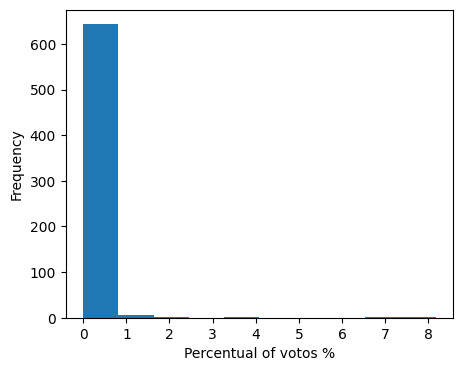

In [43]:
percentual = eleicao['PERCENTUAL_VOTOS']

binPop = pd.cut(percentual, 10)
binPop.value_counts()

ax = percentual.plot.hist(figsize=(5, 4))
ax = ax.set_xlabel('Percentual of votos %')

#### Explicação sobre o gráfico

### Boxplot para identificar possíveis outliers no percentual

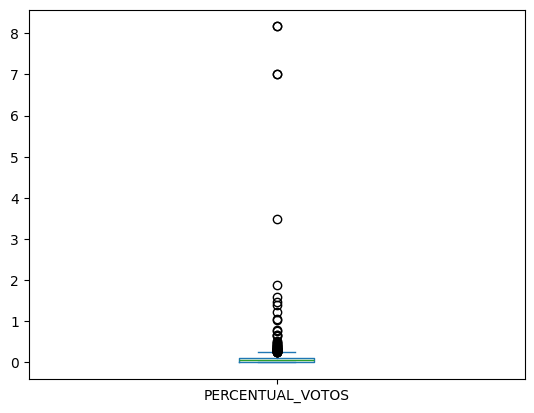

In [12]:
ax = percentual.plot.box()

#### Explicação sobre o gráfico

### Medidas de centralidade 

In [13]:
print(f"Média aritmética = {percentual.mean()}")
print(f"Moda = {percentual.mode()[0]}")
print(f"Mediana = {percentual.median()}")
print(f"Média truncada = {trim_mean(percentual, 0.1)}")


percentual.describe()

Média aritmética = 0.15267175572519087
Moda = 0.0
Mediana = 0.06461882722623292
Média truncada = 0.07214994920941985


count    655.000000
mean       0.152672
std        0.622976
min        0.000000
25%        0.023570
50%        0.064619
75%        0.114453
max        8.164744
Name: PERCENTUAL_VOTOS, dtype: float64

#### Explicação sobre as médidas de centralidade

### Qual foi o candidato mais votado segundo o percentual?

In [39]:
# Pessoa que obteve mais votos

most_popular = percentual.max()
eleicao[percentual == most_popular]

,SQ_CANDIDATO,ANO_ELEICAO,SG_UF,DS_CARGO,NR_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,QT_VOTOS,VR_RECEITA,VR_BEM_CANDIDATO,VR_DESPESA_MAX_CAMPANHA,PERCENTUAL_VOTOS
262,150000976695,2020,PB,PREFEITO,11,CICERO LUCENA,PP,05/08/1957,63,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,OUTROS,ELEITO,260665.0,2894067.98,1867828.46,1123357.13,8.164744
412,150000976695,2020,PB,PREFEITO,11,CICERO LUCENA,PP,05/08/1957,63,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,OUTROS,2º TURNO,260665.0,2894067.98,1867828.46,2808392.83,8.164744


#### Explicação sobre a pessoa mais votada


### Qual foi o candidato menos votado?

In [ ]:
less_popular = num_votos.min()
eleicao[num_votos == less_popular]

#### Explicação sobre os candidatos menos votados

### Analise a dispersão de valor de receita

In [ ]:
vr_receita = eleicao['VR_RECEITA']
vr_receita.fillna(0, inplace=True)
vr_receita_millions = vr_receita / 1000000

binPop = pd.cut(vr_receita_millions, 10)
binPop.value_counts()

ax = vr_receita_millions.plot.hist(figsize=(5, 4))
ax = ax.set_xlabel('Revenue Value (Millions) R$')

#### Explicação sobre a dispesão de valores arrecadados pelo usuário para sua campanha

In [ ]:
vr_receita.plot.box()

#### Explicação sobre o gráfico de boxplot

### Médidas de centralidade valor de receita



In [ ]:
print(f"Média = {vr_receita.mean()}")
print(f"Moda = {vr_receita.mode()[0]}")
print(f"Mediana = {vr_receita.median()}")
print(f"Média truncada = {trim_mean(vr_receita, 0.1)}")    

pd.set_option('display.float_format', lambda x: '%.2f' % x)
vr_receita.describe()

#### Explicação sobre as médidas de centralidade:

In [45]:

# Resetando a configuração de formato de números
pd.reset_option('display.float_format')

### Qual seria o candidato com maior valor arrecadado para sua campanha?

In [ ]:
most_collected = vr_receita.max()
eleicao[vr_receita == most_collected]

#### Explicação sobre a candidata com maior valor arrecadado:

### Qual seria o candidato com menor valor arrecadado para sua campanha?

In [ ]:
less_collected = vr_receita.min()
eleicao[vr_receita == less_collected]

#### Explicação sobre os menores valores arrecadados para campanhas:

### Qual seria a distribuição de idade dos candidatos?

### Qual seria o candidato mais novo a ser eleito?


### Qual seria o candidato mais velho a ser eleito?


## Análise das relações entre variáveis

#### Analisando a correlação de número de votos e valor de arrecadação para a campanha

In [ ]:
# INSIRA SEU CÓDIGO AQUI
ax = sns.lmplot(data=eleicao, x="VR_RECEITA", y="QT_VOTOS", palette="muted", ci=None) 
ax.set_axis_labels("Receita (Millions | R$)", "Número de Votos")

#### Explicação sobre o gráfico de coorelação (Scatterplot)

In [ ]:
x = eleicao['VR_RECEITA']
y = eleicao['QT_VOTOS']

pd.Series({
    'pearson': x.corr(y, method='pearson'),
    'spearman': x.corr(y, method='spearman'),
    'kendall': x.corr(y, method='kendall')
}, name='correlacao').to_frame()

#### Explicação sobre os coeficientes 

In [ ]:
heatmap_data = eleicao[['VR_RECEITA', 'QT_VOTOS']].corr()
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

#### Analisando o gráfico de heatmap

In [ ]:
ax = sns.lmplot(data=eleicao, x="VR_BEM_CANDIDATO", y="QT_VOTOS", palette="muted", ci=None) 
ax.set_axis_labels("Bens do Candidato (Millions | R$)", "Número de Votos")

#### Explicação sobre o gráfico de correlação entre bens do candidato e número de votos (Scatterplot)

In [ ]:
max_vr_candidato = eleicao['VR_BEM_CANDIDATO'].max()
candidato = eleicao[eleicao['VR_BEM_CANDIDATO'] == max_vr_candidato].reset_index()
candidato

#### Explicação sobre o candidato que tinha 83 milhões de bens avaliados

In [ ]:
x = eleicao['VR_BEM_CANDIDATO']
y = eleicao['QT_VOTOS']

pd.Series({
    'pearson': x.corr(y, method='pearson'),
    'spearman': x.corr(y, method='spearman'),
    'kendall': x.corr(y, method='kendall')
}, name='correlacao').to_frame()

#### Explicação sobre os coeficiente de correlação

In [ ]:
heatmap_data = eleicao[['VR_BEM_CANDIDATO', 'QT_VOTOS']].corr()
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

#### Explicação sobre o gráfico de heatmap

### Fazendo o log da receita para tentar analisar uma possível correlação entre as variáveis

In [ ]:
eleicao['log_receita'] = np.log(eleicao['VR_RECEITA'])
ax = sns.lmplot(data=eleicao, x="log_receita", y="QT_VOTOS", palette="muted", ci=None) 
ax.set_axis_labels("Log da Receita", "Número de Votos")

plt.show()

#### Explicação sobre o uso do log da receita

### Aplicando log em ambas as variáveis

In [ ]:
eleicao['log_receita'] = np.log(eleicao['VR_RECEITA'])
eleicao['log_votos'] = np.log(eleicao['QT_VOTOS'])
ax = sns.lmplot(data=eleicao, x="log_receita", y="log_votos", palette="muted", ci=None) 
ax.set_axis_labels("Log da Receita", "Log dos Votos")

plt.show()

#### Explicando sobre a utilização dos logs em ambas as variáveis (Quantidade de votos e receita de bens declarados)


## Análise de regressão 


### Analisando a relação entre Valor de receita e Quantida de votos

In [ ]:
# INSIRA SEU CÓDIGO AQUI
eleicao['VR_RECEITA'].fillna(0)
eleicao['QT_VOTOS'].fillna(0)


predictors = ['VR_RECEITA']
outcome = 'QT_VOTOS'

model = LinearRegression()
model.fit(eleicao[predictors], eleicao[outcome])
print(f'b0 (intercept): {model.intercept_:.2f}')
print(f'b1 (coefficient): {model.coef_[0]:.2f}')

#### Explicação sobre as variáveis de predição

In [ ]:
fitted = model.predict(eleicao[predictors])
residuals = eleicao[outcome] - fitted

ax = eleicao.plot.scatter(x='VR_RECEITA', y='QT_VOTOS', figsize=(8, 4))
ax.plot(eleicao.VR_RECEITA, fitted)
for x, yactual, yfitted in zip(eleicao.VR_RECEITA, eleicao.QT_VOTOS, fitted): 
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')

plt.tight_layout()
plt.show()

#### Explicação sobre o gráfico acima.

#### Avaliando o modelo 

In [ ]:
RMSE = np.sqrt(mean_squared_error(eleicao[outcome], fitted))
r2 = r2_score(eleicao[outcome], fitted)
print(f'Root Mean Square Error (RMSE): {RMSE:.0f}')
print(f'Coefficiente of determination (r2): {r2:.4f}')

#### Explicação sobre a avaliação do modelo (Valor de receita e a quantidade de votos):

In [ ]:
model = sm.OLS(eleicao[outcome], eleicao[predictors].assign(const=1))
results = model.fit()
results.summary()

#### Explicações adicionais com o uso do results.summary()

#### Analisando com relação ao valor de bens do candidato

In [ ]:
eleicao['VR_BEM_CANDIDATO'].fillna(0)


predictors = ['VR_BEM_CANDIDATO']
outcome = 'QT_VOTOS'

model = LinearRegression()
model.fit(eleicao[predictors], eleicao[outcome])
print(f'b0 (intercept): {model.intercept_:.2f}')
print(f'b1 (coefficient): {model.coef_[0]:.2f}')

#### Explicação sobre as variáveis de predição

In [ ]:
fitted = model.predict(eleicao[predictors])
residuals = eleicao[outcome] - fitted

ax = eleicao.plot.scatter(x='VR_BEM_CANDIDATO', y='QT_VOTOS', figsize=(8, 4))
ax.plot(eleicao.VR_BEM_CANDIDATO, fitted)
for x, yactual, yfitted in zip(eleicao.VR_BEM_CANDIDATO, eleicao.QT_VOTOS, fitted): 
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')

plt.tight_layout()
plt.show()

#### Explicação sobre o gráfico acima

#### Avaliando o modelo 

In [ ]:
RMSE = np.sqrt(mean_squared_error(eleicao[outcome], fitted))
r2 = r2_score(eleicao[outcome], fitted)
print(f'Root Mean Square Error (RMSE): {RMSE:.0f}')
print(f'Coefficiente of determination (r2): {r2:.4f}')

#### Explicação sobre a avaliação do modelo (Valor de bens declarados e a quantidade de votos):

In [ ]:
model = sm.OLS(eleicao[outcome], eleicao[predictors].assign(const=1))
results = model.fit()
results.summary()

#### Explicações adicionais com o uso do results.summary()

### Analise utilizando regressão múltipla

In [ ]:

dummy_siglas = pd.get_dummies(eleicao['SG_PARTIDO'], prefix='SG_PARTIDO', drop_first=True, dtype=int)
dummy_genero = pd.get_dummies(eleicao['DS_GENERO'], prefix='GENERO', drop_first=True, dtype=int)
dummy_cor_raca = pd.get_dummies(eleicao['DS_COR_RACA'], prefix='COR_RACA', drop_first=True, dtype=int)
dummy_grau_instrucao = pd.get_dummies(eleicao['DS_GRAU_INSTRUCAO'], prefix='GRAU_INSTRUCAO', drop_first=True, dtype=int)
dummy_estado_civil = pd.get_dummies(eleicao['DS_ESTADO_CIVIL'], prefix='ESTADO_CIVIL',drop_first=True, dtype=int)

eleicao_com_dummy = pd.concat([eleicao,dummy_cor_raca, dummy_genero, dummy_grau_instrucao, dummy_estado_civil, dummy_siglas], axis=1)
eleicao_com_dummy_sem_nulos = eleicao_com_dummy.fillna(0)

predictors = ['NR_CANDIDATO', 'NR_IDADE_DATA_POSSE', 'COR_RACA_BRANCA', 'COR_RACA_INDÍGENA', 'COR_RACA_PARDA', 'COR_RACA_PRETA', 'GENERO_MASCULINO', 'GRAU_INSTRUCAO_ENSINO FUNDAMENTAL INCOMPLETO', 'GRAU_INSTRUCAO_ENSINO MÉDIO COMPLETO', 'GRAU_INSTRUCAO_ENSINO MÉDIO INCOMPLETO', 'GRAU_INSTRUCAO_LÊ E ESCREVE', 'GRAU_INSTRUCAO_SUPERIOR COMPLETO', 'GRAU_INSTRUCAO_SUPERIOR INCOMPLETO' , 'ESTADO_CIVIL_DIVORCIADO(A)', 'ESTADO_CIVIL_SEPARADO(A) JUDICIALMENTE', 'ESTADO_CIVIL_SOLTEIRO(A)', 'ESTADO_CIVIL_VIÚVO(A)','SG_PARTIDO_DC', 'SG_PARTIDO_MDB', 'SG_PARTIDO_PC do B', 'SG_PARTIDO_PDT', 'SG_PARTIDO_PL', 'SG_PARTIDO_PMB', 'SG_PARTIDO_PP', 'SG_PARTIDO_PROS', 'SG_PARTIDO_PRTB', 'SG_PARTIDO_PSB', 'SG_PARTIDO_PSD', 'SG_PARTIDO_PSDB', 'SG_PARTIDO_PSOL', 'SG_PARTIDO_PT', 'SG_PARTIDO_PTB', 'SG_PARTIDO_PV', 'SG_PARTIDO_REDE', 'SG_PARTIDO_REPUBLICANOS', 'SG_PARTIDO_SOLIDARIEDADE', 'SG_PARTIDO_UNIÃO', 'VR_RECEITA', 'VR_BEM_CANDIDATO']

outcome = 'QT_VOTOS'

model = LinearRegression()
model.fit(eleicao_com_dummy_sem_nulos[predictors], eleicao_com_dummy_sem_nulos[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, model.coef_):
    print(f' {name}: {coef}')
    


#### Explicação sobre os coeficientes:

In [ ]:
fitted = model.predict(eleicao_com_dummy_sem_nulos[predictors])
RMSE = np.sqrt(mean_squared_error(eleicao_com_dummy_sem_nulos[outcome], fitted))
r2 = r2_score(eleicao_com_dummy_sem_nulos[outcome], fitted)
print(f'Root Mean Square Error (RMSE): {RMSE:.0f}')
print(f'Coefficiente of determination (r2): {r2:.4f}')

#### Explicação sobre as medidas apresentadas do RMSE e o coeficiente de determinação (R²)

In [ ]:
model = sm.OLS(eleicao_com_dummy_sem_nulos[outcome], eleicao_com_dummy_sem_nulos[predictors].assign(const=1))
results = model.fit()
results.summary()

#### Explicação sobre alguns outros coeficientes mostrados:

In [ ]:
dummy_genero = pd.get_dummies(eleicao['DS_GENERO'], prefix='GENERO', drop_first=True, dtype=int)
dummy_estado_civil = pd.get_dummies(eleicao['DS_ESTADO_CIVIL'], prefix='ESTADO_CIVIL',drop_first=True, dtype=int)

eleicao_com_dummy = pd.concat([eleicao, dummy_genero, dummy_estado_civil], axis=1)
eleicao_com_dummy_sem_nulos = eleicao_com_dummy.fillna(0)

predictors = ['GENERO_MASCULINO', 'ESTADO_CIVIL_SOLTEIRO(A)','VR_RECEITA']

outcome = 'QT_VOTOS'

model = LinearRegression()
model.fit(eleicao_com_dummy_sem_nulos[predictors], eleicao_com_dummy_sem_nulos[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, model.coef_):
    print(f' {name}: {coef}')

In [ ]:
fitted = model.predict(eleicao_com_dummy_sem_nulos[predictors])
RMSE = np.sqrt(mean_squared_error(eleicao_com_dummy_sem_nulos[outcome], fitted))
r2 = r2_score(eleicao_com_dummy_sem_nulos[outcome], fitted)
print(f'Root Mean Square Error (RMSE): {RMSE:.0f}')
print(f'Coefficiente of determination (r2): {r2:.4f}')

In [ ]:
model = sm.OLS(eleicao_com_dummy_sem_nulos[outcome], eleicao_com_dummy_sem_nulos[predictors].assign(const=1))
results = model.fit()
results.summary()


### Exemplos de outras questões que podem ser discutidas

### Quanto um candidato deve arrecadar no mínimo (receita) para ter mais chance de ser eleito?

In [ ]:
candidatos_eleitos = eleicao[eleicao['DS_SIT_TOT_TURNO'].str.startswith('ELEITO')]
candidatos_eleitos = candidatos_eleitos.fillna(0)
media_receita = candidatos_eleitos['VR_RECEITA'].mean()
minimo_receita = candidatos_eleitos['VR_RECEITA'].min()
print("Valor médio da receita para candidatos eleitos: R$ {:.2f}".format(media_receita))
print("O valor minimo da receita para o candidato ser eleito é : R$ {:.2f}".format(minimo_receita))


#### Explicação sobre o que foi levantado:

#### Considere um candidato fictício que arrecadou 100 mil reais de receita na campanha. Qual a previsão de votos que ele deve receber? É provável que ele seja eleito?

In [ ]:
eleicao_copy = eleicao.copy()
eleicao_copy['VR_RECEITA'] = eleicao['VR_RECEITA'].fillna(0)
eleicao_copy['QT_VOTOS'] = eleicao['QT_VOTOS'].fillna(0)
predictors = ['VR_RECEITA']
outcome = 'QT_VOTOS'
model = LinearRegression()
model.fit(eleicao_copy[predictors], eleicao_copy[outcome])
orcamento_campanha = 100000
previsao_votos = model.predict([[orcamento_campanha]])
print(f"Número esperado de votos para um orçamento de R$ {orcamento_campanha:.2f} de campanha: {previsao_votos[0]:.2f} votos.")



#### Explicando o resultado da predição:

#### Considere um candidato fictício que o candidato tinha 100 mil em valor de bens. Qual a previsão de votos que ele deve receber? É provável que ele seja eleito?

In [ ]:
eleicao_copy = eleicao.copy()
eleicao_copy['VR_BEM_CANDIDATO'] = eleicao['VR_BEM_CANDIDATO'].fillna(0)
eleicao_copy['QT_VOTOS'] = eleicao['QT_VOTOS'].fillna(0)
predictors = ['VR_BEM_CANDIDATO']
outcome = 'QT_VOTOS'
model = LinearRegression()
model.fit(eleicao_copy[predictors], eleicao_copy[outcome])
valor_bem_candidato = 100000
previsao_votos = model.predict([[valor_bem_candidato]])
print(f"Número esperado de votos para um valor de bens do candidato de R$ {valor_bem_candidato:.2f} de campanha: {previsao_votos[0]:.2f} votos.")


#### Explicando o resultado da predição:

### É possível estimar bem se um candidato vai ser eleito ou não com base em outras variáveis (ex: regressão logística com a situação final do candidato)?

In [ ]:
from sklearn.linear_model import LogisticRegression

eleicao_copy = eleicao.copy()
categorias_interesse = ['ELEITO POR MÉDIA', 'NÃO ELEITO']
eleicao_copy = eleicao_copy[eleicao_copy['DS_SIT_TOT_TURNO'].isin(categorias_interesse)]

limites = [0, 5000, 10000, 15000, 20000, 25000, 30000, 50000, 100000, np.inf]
categorias = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000-50000', '50000-100000', '100000+']


eleicao_copy['DS_SIT_TOT_TURNO'] = eleicao_copy['DS_SIT_TOT_TURNO'].astype('category')
eleicao_copy['DS_SIT_TOT_TURNO'] = eleicao_copy['DS_SIT_TOT_TURNO'].cat.reorder_categories(['ELEITO POR MÉDIA', 'NÃO ELEITO'])
eleicao_copy['DS_GENERO'] = eleicao_copy['DS_GENERO'].astype('category')
eleicao_copy['DS_ESTADO_CIVIL'] = eleicao_copy['DS_ESTADO_CIVIL'].astype('category')
eleicao_copy['DS_COR_RACA'] = eleicao_copy['DS_COR_RACA'].astype('category')
eleicao_copy['VR_RECEITA'] = pd.cut(eleicao_copy['VR_RECEITA'], bins=limites, labels=categorias, right=False).astype('category')

outcome = 'DS_SIT_TOT_TURNO'
predictors  = ['DS_GENERO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'VR_RECEITA']
eleicao_copy[[outcome] + predictors]

X = pd.get_dummies(eleicao_copy[predictors], prefix='', prefix_sep='', 
                   drop_first=True)
y = eleicao_copy[outcome] 

logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(X, y)

print('intercept ', logit_reg.intercept_[0])
print('classes', logit_reg.classes_)
pd.DataFrame({'coeff': logit_reg.coef_[0]}, 
             index=X.columns)


#### Explicação sobre a regressão Logística em relação aos dados apresentados: (o valor negativo tende a ser para primeira classe)

### Realizando a avaliação do modelo utilizando uma nova coluna que vai verificar se os candidatos foram eleitos ou não, caso seja eleito vai ficar 1 e caso não seja vai ficar 0.

In [ ]:
from sklearn.linear_model import LogisticRegression

eleicao_copy = eleicao.copy()
eleicao_copy['ELEITO'] = eleicao_copy['DS_SIT_TOT_TURNO'].apply(lambda x: 1 if x in ['ELEITO POR MÉDIA', 'ELEITO POR QP'] else 0)

limites = [0, 5000, 10000, 15000, 20000, 25000, 30000, 50000, 100000, np.inf]
categorias = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000-50000', '50000-100000', '100000+']

eleicao_copy['ELEITO'] = eleicao_copy['ELEITO'].astype('category')
eleicao_copy.sort_values(by='ELEITO', ascending=False, inplace=True)
eleicao_copy['DS_GENERO'] = eleicao_copy['DS_GENERO'].astype('category')
eleicao_copy['DS_ESTADO_CIVIL'] = eleicao_copy['DS_ESTADO_CIVIL'].astype('category')
eleicao_copy['DS_COR_RACA'] = eleicao_copy['DS_COR_RACA'].astype('category')
eleicao_copy['VR_RECEITA'] = pd.cut(eleicao_copy['VR_RECEITA'], bins=limites, labels=categorias, right=False).astype('category')


outcome = 'ELEITO'
predictors  = ['DS_GENERO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'VR_RECEITA']
eleicao_copy[[outcome] + predictors]

X = pd.get_dummies(eleicao_copy[predictors], prefix='', prefix_sep='', 
                   drop_first=True)
y = eleicao_copy[outcome] 

logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(X, y)

print('intercept ', logit_reg.intercept_[0])
print('classes', logit_reg.classes_)
pd.DataFrame({'coeff': logit_reg.coef_[0]}, 
             index=X.columns)

#### Explicação sobre o que foi levantado: